In [ ]:
import torch
import torch.nn as nn
import math
import pickle
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from torchvision.transforms import ToTensor
import numpy as np
import pandas as pd 
import pywt
import pywt.data 

In [67]:
pywt.wavelist(kind='discrete')

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [65]:
for family in pywt.families():  #小波族
    print(family,pywt.wavelist(family)) #每个小波族的每个小波函数

haar ['haar']
db ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
sym ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
coif ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
bior ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
rbio ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8']
dmey ['dme

In [ ]:
def test_pywt(img, ):
    img = pywt.data.camera()
    # Wavelet transform of image, and plot approximation and details
    titles = ['Approximation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']
    coeffs2 = pywt.dwt2(img, 'bior1.3')
    #coeffs2 = pywt.dwt2(img, 'bior1.5')
    LL, (LH, HL, HH) = coeffs2
    h,w = img.shape

    LLmean = np.sum(LL)/h/w
    LHmean = np.sum(LH)/h/w
    HLmean = np.sum(HL)/h/w
    HHmean = np.sum(HH)/h/w
    print(f"LLmean {LLmean}")
    print(f"LHmean {LHmean}")
    print(f"HLmean {HLmean}")
    print(f"HHmean {HHmean}")

    plt.imshow(img)
    plt.colorbar(shrink=0.8)
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig.tight_layout()
    plt.show()


In [ ]:
img_path = r'footballField_01.jpg'
img_path = r'Farmland-01.jpg'
img = Image.open(img_path)
img  = np.array(img)
img = img.transpose(0,1,2)
imgt = ToTensor()(img)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_pywt(img)

LLmean 32.54501574954977
LHmean -2.6740192009144036e-05
HLmean 0.0042766492466299695
HHmean -0.000259725884094311


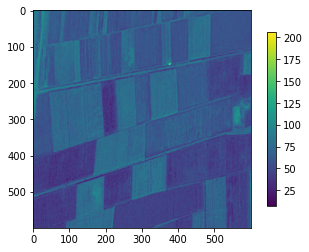

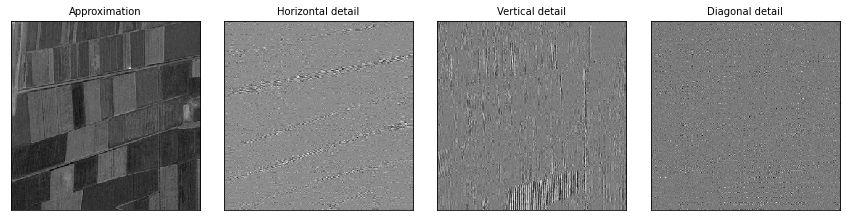

In [61]:
img_path = r'footballField_01.jpg'
img_path = r'Farmland-01.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

titles = ['Approximation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(img, 'bior6.8')
#coeffs2 = pywt.dwt2(img, 'bior1.5')

LL, (LH, HL, HH) = coeffs2
h,w = img.shape

LLmean = np.sum(LL)/h/w
LHmean = np.sum(LH)/h/w
HLmean = np.sum(HL)/h/w
HHmean = np.sum(HH)/h/w
print(f"LLmean {LLmean}")
print(f"LHmean {LHmean}")
print(f"HLmean {HLmean}")
print(f"HHmean {HHmean}")

plt.imshow(img)
plt.colorbar(shrink=0.8)
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


In [ ]:
img_path = r'footballField_01.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
test_pywt(img)

In [68]:
db3 = pywt.Wavelet('db3')   #创建一个小波对象
print(db3)

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [69]:
bior13 = pywt.Wavelet('bior1.3')   #创建一个小波对象
print(bior13)

Wavelet bior1.3
  Family name:    Biorthogonal
  Short name:     bior
  Filters length: 6
  Orthogonal:     False
  Biorthogonal:   True
  Symmetry:       symmetric
  DWT:            True
  CWT:            False
